# Today's Coding Topics
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/data-programming-with-python/blob/main/2023-summer/2023-07-03/notebook/concept_and_code_demo.ipynb)

* Recap of previous lecture
* The Python visualization landscape
* Demos on common visulization libraries
    * `matplotlib`
    * `seaborn`
* Appendix
    * `plotly`
    * `bokeh`

# Homework recap

In [1]:
x = 2
x

2

# Recap on Python and Hypothesis Test

There are many Python statistics libraries for you to work with.

* **Foundation Libraries**
    * `statistics`: built-in Python library for descriptive statistics (link: https://docs.python.org/3/library/statistics.html)
    * `numpy`: numerical computing, numpy arrays
    * `scipy`: scientific computing based on numpy, the `scipy.stats` module (link: https://docs.scipy.org/doc/scipy/reference/stats.html) covers a large number of probability distributions and statistical functions (link: https://www.scipy.org/)
    
* **Data Science Libraries**
    * `pandas`: 1D and 2D labeled data manipulations and computation
    * `statsmodels`: a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration (link: https://www.statsmodels.org/stable/index.html)
    * `matplotlib`: graphs and visualization (link: https://matplotlib.org/)

## Hypothesis Test

wikipedia: https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

`Hypothesis` is a statement about a parameter. A `hypothesis test` is a standard procedure to test a statement (the `hypothesis`), and typically we need to select between two complementary `hypothesis`:
* `Null hypothesis` ($H_0$): A statment about an established fact of a parameter. The null hypothesis is generally assumed to be true until evidence indicates otherwise (similar to the case that a defendant of a jury trial is presumed innocent until proven guilty). It is normally expressed as Math equation, and **it must contain a condition of equality, such as $=,\geq, \leq $**.
* `Alternative hypothesis` ($H_1$): A statement that the parameter has a value that differs from the null hypothesis.
 Needs a strong support from data to change our thinking and contradicts Ho. Expressed as Math statement it contains $\neq, <, >$.

We also need a `test statistic` (a quantity derived from the sample). Typically it is selected or defined in such a way as to quantify, within observed data, behaviours that would distinguish the `null` from the `alternative hypothesis`, where such an alternative is prescribed, or that would characterize the null hypothesis if there is no explicitly stated alternative hypothesis. Normally, we should have a good idea on the sampling distribution of the test statistic.
* List of commonly used `test statistic`: https://en.wikipedia.org/wiki/Test_statistic

| Null Hypothesis        | Alternative Hypothesis      | Type of Alternative |
|------------------------|-----------------------------|---------------------|
|                        | $H_1$: $\theta < \theta_0$    | lower one-sided     |
| $H_0$: $\theta=\theta_0$ | $H_1$: $\theta > \theta_0$    | upper one-sided     |
|                        | $H_1$: $\theta \neq \theta_0$ | two-sided           |

|                                   | $H_0$ is true (Truly not guilty) |    $H_1$ is true (Truly guilty)   |
|-----------------------------------|---------------------------|----------------------------|
|  Accept null hypothesis Acquittal |        Right decision       | Wrong decision **Type II Error** |
| Reject null hypothesis Conviction | Wrong decision **Type I Error** |        Right decision        |

### One Population Proportion

**Example: How to tell if a coin is fair?**

**Problem**: Suppose we tossed a coin 100 times and we have obtained 38
Heads and 62 Tails. Is the coin biased toward tails? 

$H_0$: $p_{head} = 0.5$

$H_1$: $p_{head} \neq 0.5$ (two-sided)

Significance level $\alpha=0.05$

`Test statistic`: $z = \frac{\hat{p}-p_0}{SD(p_0)} \sim N(0,1)$ according to `central limit theorem`, where $SD(p_0) =\sqrt{\frac{p_0q_0}{n}} = \sqrt{\frac{p_0(1-p_0)}{n}} $.
![](https://www.investopedia.com/thmb/pF9cbALKXUA617NzyoKozi1B0rQ=/954x380/filters:no_upscale():max_bytes(150000):strip_icc()/Clipboard01-5c94e6b446e0fb00010ae8ed.jpg)

In [2]:
from scipy import stats
import numpy as np

In [3]:
n = 100
p = 38/n
sd = (p*(1-p)/n)**0.5
z = (p-0.5)/sd

In [4]:
z

-2.4722569302909876

In [5]:
p = 2 * stats.norm.cdf(z) # two-sided

In [6]:
p

0.013426298293326975

In [7]:
stats.norm.ppf([0.025,0.975]) # the 5% confidence interval boundary for two-sided alternative hypothesis

array([-1.95996398,  1.95996398])

We can also do t-test: $t = \frac{\hat{p}-p_0}{SD(p_0)} \sim t_{n-1}$

In [8]:
p = 2 * stats.t.cdf(z, df = n-1) # two-sided
p

0.015131634778085726

In [9]:
stats.t.ppf([0.025,0.975], df=n-1) # the 5% confidence interval boundary for two-sided alternative hypothesis

array([-1.98421695,  1.98421695])

We can also use the `statsmodels` library to do the z-test

In [11]:
import statsmodels.api as sm

In [12]:
sm.stats.proportions_ztest(count=38,nobs=100,value=0.5,alternative='two-sided')

(-2.4722569302909876, 0.013426298293326975)

### Two Population Proportion Difference

**Problem**: A car manufacturer aims to improve the quality of the products by reducing the defects and also increase the customer satisfaction. Therefore, he monitors the efficiency of two assembly lines in the shop floor. In line A there are 18 defects reported out of 200 samples. While the line B shows 25 defects out of 600 cars. At α 5%, is the differences between two assembly procedures are significant?

$H_0$: $p_1 - p_2 = 0$

$H_1$: $p_1 - p_2 \neq 0$ (two-sided)

Significance level $\alpha=0.05$

`Test statistic`: $z = \frac{\hat{p_1}-\hat{p_2} - 0}{SD} \sim N(0,1)$ according to `central limit theorem`, where $SD = \sqrt{p_0(1-p_0)(\frac{1}{n_1}+\frac{1}{n_2})}$, and $p_0 = \frac{x_1+x_2}{n_1+n_2}$.

In [13]:
import math

x1 = 18
n1 = 200
x2 = 25
n2 = 600

p1 = x1/n1
p2 = x2/n2
p0 = (x1+x2)/(n1+n2)
# sd = math.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
sd = math.sqrt(p0*(1-p0)*(1/n1 + 1/n2))
z = (p1-p2)/sd
z

2.624824049200042

In [14]:
p = 2 * (1-stats.norm.cdf(z)) # two-sided
p

0.008669375420073067

In [15]:
p1, p2

(0.09, 0.041666666666666664)

We can also use the `statsmodels` library to do the z-test

In [ ]:
import statsmodels.api as sm

In [16]:
sm.stats.proportions_ztest(
    count=np.array([x1,x2]),
    nobs=np.array([n1,n2]),
    value=0,
    alternative='two-sided'
)

(2.624824049200042, 0.008669375420073044)

In [17]:
sm.stats.proportions_ztest(
    count=np.array([x1,x2]),
    nobs=np.array([n1,n2]),
    value=0,
    alternative='larger'
)

(2.624824049200042, 0.004334687710036522)

### One Population Mean

**Problem**: Your company wants to improve sales. Past sales data indicate that the average sale was \\$100 per transaction. After training your sales force, recent sales data (taken from a sample of 25 salesmen) indicates an average sale of \\$130, with a standard deviation of \\$15. Did the training work? Test your hypothesis at a 5\% alpha level.

$H_0$: $\mu = \mu_0$

$H_1$: $\mu \geq \mu_0$ (upper one-side)

Significance level $\alpha=0.05$

`z-test`: $z = \frac{\bar{x} - \mu_0}{s/\sqrt{n}} \sim N(0,1)$, where $s$ is the sample standard deviation

`t-test`: $t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}} \sim t_{n-1}$, where $s$ is the sample standard deviation, and $n$ is the sample size

In [18]:
## z-test
mu0 = 100
xbar = 130
n = 25
s = 15

z = (xbar - mu0)/(s/math.sqrt(n))
z

10.0

In [19]:
p = 1-stats.norm.cdf(z)
p

0.0

In [20]:
## t-test
t = z
p = 1-stats.t.cdf(t, df=n-1)
p

2.457762882102088e-10

### Two Population Mean Difference

**Problem #1**: Does right‐ or left‐handedness affect how fast people type? Random samples of students from a typing class are given a typing speed test (words per minute), and the results are compared. Significance level for the test: 0.10. Because you are looking for a difference between the groups in either direction (right‐handed faster than left, or vice versa), this is a two‐tailed test.

| Group | Handedness | n  | $\bar{x}$ | s   |
|-------|------------|----|-----------|-----|
| 1     | Left       | 9  | 59.3      | 4.3 |
| 2     | Right      | 16 | 55.8      | 5.7 |

$H_0$: $\mu_1 - \mu_2 = 0$

$H_1$: $\mu_1 - \mu_2 \neq 0$ (two-sided)

Significance level $\alpha=0.05$

Like before, assume the two groups have the same variance, we could do either `z-test` or `t-test`.
$$
\frac{\bar{x_1} - \bar{x_2} - 0}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2})}} \sim N(0,1)
$$
or
$$
\frac{\bar{x_1} - \bar{x_2} - 0}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2})}} \sim t_{n_1+n_2-2}
$$
Here, $s_p$ is the pooled variance $s_p^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}$


In [21]:
n1 = 9
n2 = 16

xbar1 = 59.3
xbar2 = 55.8

s1 = 4.3
s2 = 5.7

sp = math.sqrt(((n1-1)*(s1**2) + (n2-1)*(s2**2))/(n1+n2-2))
sp

5.255514701968656

In [22]:
# z test
z = (xbar1 - xbar2)/(sp*math.sqrt(1/n1+1/n2))
z

1.598321092480905

In [23]:
p = (1-stats.norm.cdf(z))*2
p

0.10997153556825423

In [24]:
## t-test
t = z
p = (1-stats.t.cdf(t, df=n1+n2-2))*2
p

0.12362027057415004

**Problem #2**: An experiment is conducted to determine whether intensive tutoring (covering a great deal of material in a fixed amount of time) is more effective than paced tutoring (covering less material in the same amount of time). Two randomly chosen groups are tutored separately and then administered proficiency tests. Use a significance level of α < 0.05.

| Group | Method | n  | $\bar{x}$ | s   |
|-------|------------|----|-----------|-----|
| 1     | Intensive       | 12  | 46.31      | 6.44 |
| 2     | Paced      | 10 | 42.79      | 7.52 |


$H_0$: $\mu_1 - \mu_2 = 0$

$H_1$: $\mu_1 - \mu_2 \neq 0$ (two-sided)

Significance level $\alpha=0.05$

Like before, assume the two groups have the same variance, we could do either `z-test` or `t-test`.
$$
\frac{\bar{x_1} - \bar{x_2} - 0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} \sim N(0,1)
$$
or
$$
\frac{\bar{x_1} - \bar{x_2} - 0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} \sim t_{n_1+n_2-2}
$$



In [25]:
n1 = 12
n2 = 10

xbar1 = 46.31
xbar2 = 42.79

s1 = 6.44
s2 = 7.52

# z-test
z = (xbar1-xbar2)/math.sqrt(s1**2/n1 + s2**2/n2)
z

1.1661529333715528

In [26]:
p = (1-stats.norm.cdf(z))*2
p

0.24355261824992303

In [27]:
# t-test

t = z
p = (1-stats.t.cdf(t, df=n1+n2-2))*2
p

0.25727109176568974

# Residual Topics on Statistics

## Correlation Analysis

### One pair of variables

https://en.wikipedia.org/wiki/Correlation_and_dependence

`Pearson's correlation coefficient`
$$
r = \frac{\sum_{i=1}^n(X_i-\bar{X})(Y_i-\bar{Y})}{\sqrt{\sum_{i=1}^n(X_i-\bar{X})^2}\sqrt{\sum_{i=1}^n(Y_i-\bar{Y})^2}}
$$

With the sample covariance $s_{xy}$ defined as
$$
s_{xy} = \frac{\sum_{i=1}^n(X_i-\bar{X})(Y_i-\bar{Y})}{n-1}
$$
and $s_x$, $s_y$ the sample standard deviations of the x and y values, then
$$
r = \frac{s_{xy}}{s_x\cdot s_y}
$$

Example 1: 
![](https://www.mathsisfun.com/data/images/correlation-examples.svg)

Example 2:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1200px-Correlation_examples2.svg.png)

[offline-reading] `Spearman's Correlation`: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

Generate the dataset

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
np.random.seed(123)
data1 = 20 * np.random.randn(1000) + 100
data1[:10]

array([ 78.28738793, 119.94690893, 105.65956996,  69.87410572,
        88.42799496, 133.02873074,  51.46641513,  91.42174742,
       125.31872517,  82.66519195])

In [30]:
data1 = 20 * np.random.randn(1000) + 100
data1[:10]

array([ 85.02345069, 111.35189452, 114.36301085,  80.01238501,
       109.49796646,  62.63000373,  95.94682186,  77.31503947,
        83.8460132 ,  74.47845296])

data1: mean=99.209 stdv=20.016
data2: mean=149.293 stdv=21.918


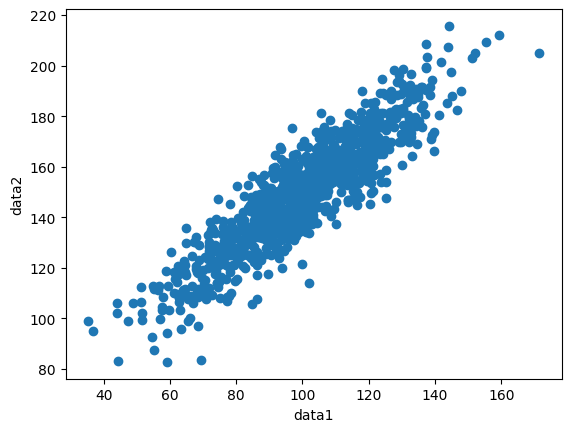

In [32]:
# seed random number generator
np.random.seed(123)
# prepare data
data1 = 20 * np.random.randn(1000) + 100
data2 = data1 + (10 * np.random.randn(1000) + 50)

# summarize
print('data1: mean={:.3f} stdv={:.3f}'.format(np.mean(data1), np.std(data1)))
print('data2: mean={:.3f} stdv={:.3f}'.format(np.mean(data2), np.std(data2)))
# plot
plt.scatter(data1, data2)
plt.xlabel('data1')
plt.ylabel('data2')
plt.show()

Follow the formula to calculate the correlation between `data1` and `data2`

In [33]:
# compute the covariance
covariance = np.cov(data1,data2)
covariance

array([[401.03130941, 395.02661088],
       [395.02661088, 480.89201322]])

In [34]:
s1 = np.std(data1)
s2 = np.std(data2)
r_manual = covariance[0,1]/(s1*s2)
r_manual

0.9004258246090369

In [35]:
from scipy import stats

In [36]:
# a quicker way to calculate the correlation

stats.pearsonr(data1,data2)

PearsonRResult(statistic=0.8995253987844278, pvalue=0.0)

In [37]:
corr, _  = stats.pearsonr(data1,data2)
corr

0.8995253987844278

### Multivariate correlations

`Sample data`: fake dataset from a personally test of 200 individuals
(Source: https://raphaelvallat.com/correlation.html)

The personality dimensions are defined according to the Big Five model (or OCEAN), and are typically measured on a 1 to 5 scale
* Openness to experience (inventive/curious vs. consistent/cautious)
* Conscientiousness (efficient/organized vs. easy-going/careless)
* Extraversion (outgoing/energetic vs. solitary/reserved)
* Agreeableness (friendly/compassionate vs. challenging/detached)
* Neuroticism (sensitive/nervous vs. secure/confident)

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('../data/data_corr.csv',sep=',',header=0)
df

,Age,IQ,Height,Weight,O,C,E,A,N
0,56,110,158.0,57.1,3.94,3.46,4.21,3.96,2.48
1,46,85,168.7,74.1,3.96,3.23,3.19,3.40,2.60
2,32,94,162.8,74.1,3.42,3.50,2.90,2.75,2.81
3,60,95,166.5,77.9,3.52,2.79,3.56,3.17,2.90
4,25,112,164.9,75.5,4.02,2.85,3.33,3.21,3.02
...,...,...,...,...,...,...,...,...,...
195,49,99,179.4,75.1,3.40,3.92,3.79,3.21,2.29
196,49,83,165.5,52.9,3.71,2.98,4.19,4.02,2.65
197,41,92,168.0,58.3,4.08,3.40,3.27,4.09,2.04
198,58,100,167.9,51.5,3.06,2.88,2.85,3.48,2.98


In [40]:
df.shape

(200, 9)

In [41]:
df.describe()

,Age,IQ,Height,Weight,O,C,E,A,N
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,41.570000,112.065000,167.105000,70.044000,3.569700,3.197750,3.474100,3.41170,2.837200
std,13.715527,14.538833,8.247313,9.080265,0.334745,0.386191,0.362778,0.35116,0.419751
min,18.000000,80.000000,145.300000,43.100000,2.650000,2.400000,2.400000,2.33000,1.650000
25%,30.000000,101.000000,162.250000,64.400000,3.310000,2.895000,3.265000,3.21000,2.560000
50%,42.000000,111.000000,167.250000,70.950000,3.560000,3.200000,3.500000,3.44000,2.815000
75%,54.000000,123.000000,173.050000,75.425000,3.795000,3.480000,3.690000,3.63500,3.100000
max,64.000000,151.000000,188.400000,92.700000,4.580000,4.420000,4.420000,4.42000,3.880000


In [42]:
df.corr()

,Age,IQ,Height,Weight,O,C,E,A,N
Age,1.000000,-0.006462,-0.051864,-0.052608,-0.030543,-0.127538,-0.114130,-0.068844,0.079386
IQ,-0.006462,1.000000,0.071376,0.106311,-0.005861,0.013003,-0.056082,-0.083350,0.126072
Height,-0.051864,0.071376,1.000000,0.446965,-0.123484,0.032682,-0.071206,-0.027774,0.066317
Weight,-0.052608,0.106311,0.446965,1.000000,-0.111306,0.102224,0.001268,-0.002052,-0.154197
O,-0.030543,-0.005861,-0.123484,-0.111306,1.000000,-0.018679,0.272970,0.070793,-0.039832
C,-0.127538,0.013003,0.032682,0.102224,-0.018679,1.000000,0.014496,0.065807,-0.368334
E,-0.114130,-0.056082,-0.071206,0.001268,0.272970,0.014496,1.000000,0.020212,-0.343731
A,-0.068844,-0.083350,-0.027774,-0.002052,0.070793,0.065807,0.020212,1.000000,-0.173934
N,0.079386,0.126072,0.066317,-0.154197,-0.039832,-0.368334,-0.343731,-0.173934,1.000000


In [43]:
df.corr().T

,Age,IQ,Height,Weight,O,C,E,A,N
Age,1.000000,-0.006462,-0.051864,-0.052608,-0.030543,-0.127538,-0.114130,-0.068844,0.079386
IQ,-0.006462,1.000000,0.071376,0.106311,-0.005861,0.013003,-0.056082,-0.083350,0.126072
Height,-0.051864,0.071376,1.000000,0.446965,-0.123484,0.032682,-0.071206,-0.027774,0.066317
Weight,-0.052608,0.106311,0.446965,1.000000,-0.111306,0.102224,0.001268,-0.002052,-0.154197
O,-0.030543,-0.005861,-0.123484,-0.111306,1.000000,-0.018679,0.272970,0.070793,-0.039832
C,-0.127538,0.013003,0.032682,0.102224,-0.018679,1.000000,0.014496,0.065807,-0.368334
E,-0.114130,-0.056082,-0.071206,0.001268,0.272970,0.014496,1.000000,0.020212,-0.343731
A,-0.068844,-0.083350,-0.027774,-0.002052,0.070793,0.065807,0.020212,1.000000,-0.173934
N,0.079386,0.126072,0.066317,-0.154197,-0.039832,-0.368334,-0.343731,-0.173934,1.000000


In [44]:
type(df.corr())

pandas.core.frame.DataFrame

In [45]:
corrs = df.corr()
corrs

,Age,IQ,Height,Weight,O,C,E,A,N
Age,1.000000,-0.006462,-0.051864,-0.052608,-0.030543,-0.127538,-0.114130,-0.068844,0.079386
IQ,-0.006462,1.000000,0.071376,0.106311,-0.005861,0.013003,-0.056082,-0.083350,0.126072
Height,-0.051864,0.071376,1.000000,0.446965,-0.123484,0.032682,-0.071206,-0.027774,0.066317
Weight,-0.052608,0.106311,0.446965,1.000000,-0.111306,0.102224,0.001268,-0.002052,-0.154197
O,-0.030543,-0.005861,-0.123484,-0.111306,1.000000,-0.018679,0.272970,0.070793,-0.039832
C,-0.127538,0.013003,0.032682,0.102224,-0.018679,1.000000,0.014496,0.065807,-0.368334
E,-0.114130,-0.056082,-0.071206,0.001268,0.272970,0.014496,1.000000,0.020212,-0.343731
A,-0.068844,-0.083350,-0.027774,-0.002052,0.070793,0.065807,0.020212,1.000000,-0.173934
N,0.079386,0.126072,0.066317,-0.154197,-0.039832,-0.368334,-0.343731,-0.173934,1.000000


In [46]:
corrs.describe()

,Age,IQ,Height,Weight,O,C,E,A,N
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.069711,0.129445,0.149224,0.148512,0.112673,0.079296,0.080422,0.088984,0.021305
std,0.354088,0.333883,0.359463,0.364343,0.352811,0.372814,0.380183,0.350215,0.408036
min,-0.127538,-0.083350,-0.123484,-0.154197,-0.123484,-0.368334,-0.343731,-0.173934,-0.368334
25%,-0.068844,-0.006462,-0.051864,-0.052608,-0.039832,-0.018679,-0.071206,-0.068844,-0.173934
50%,-0.051864,0.013003,0.032682,0.001268,-0.018679,0.014496,0.001268,-0.002052,-0.039832
75%,-0.006462,0.106311,0.071376,0.106311,0.070793,0.065807,0.020212,0.065807,0.079386
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


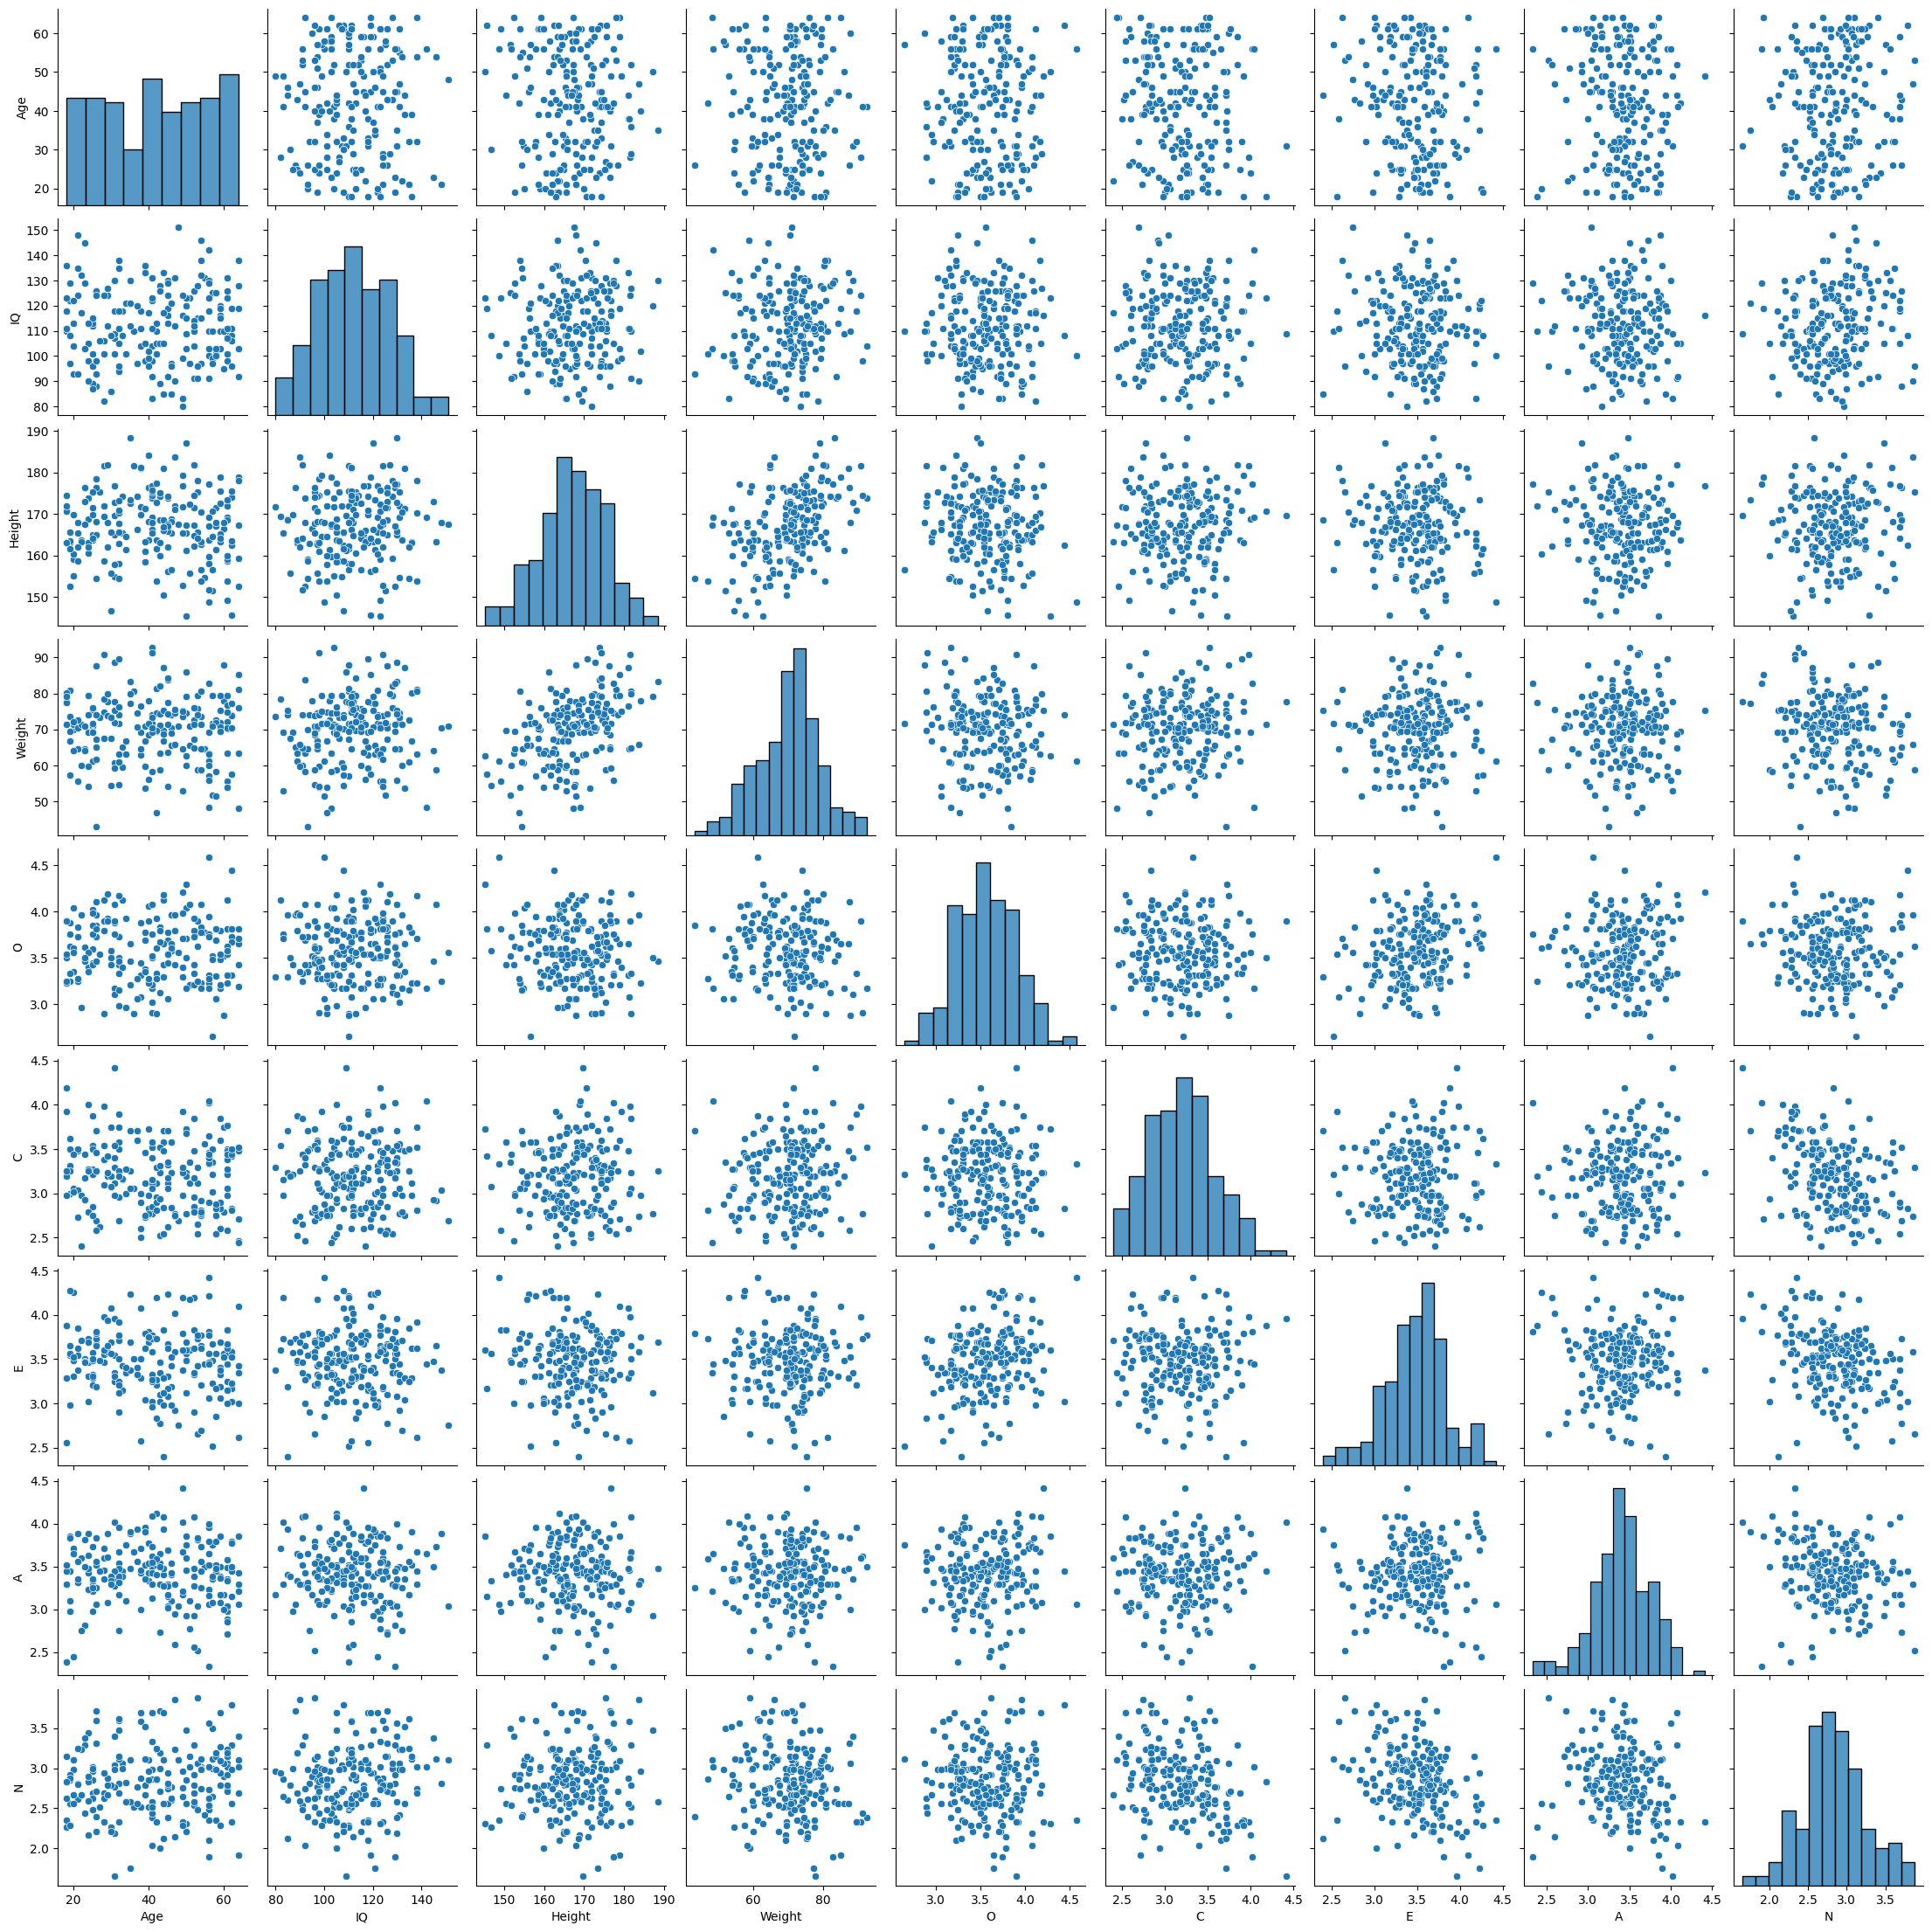

In [47]:
import seaborn as sns
sns.pairplot(df)

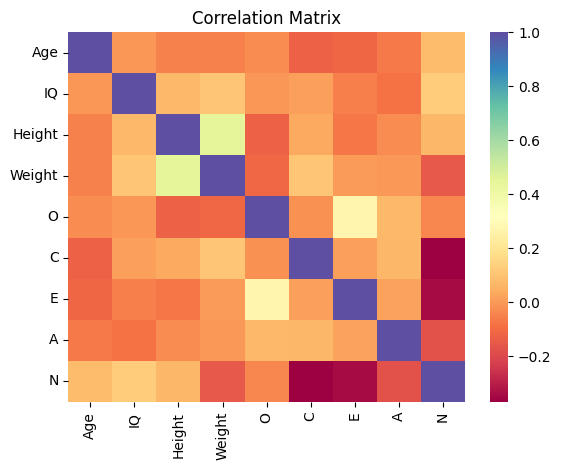

In [48]:
# sns.heatmap(corrs, cmap='Spectral', vmin=-0.4, vmax=0.4) #http://seaborn.pydata.org/tutorial/color_palettes.html
sns.heatmap(corrs, cmap='Spectral')
plt.title('Correlation Matrix')
plt.show()

In [49]:
# we can also create a map to cover half of the matrix
mask = np.zeros_like(corrs)
# find the indices of the upper triangle of the given matrix
## https://numpy.org/doc/stable/reference/generated/numpy.triu_indices_from.html
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

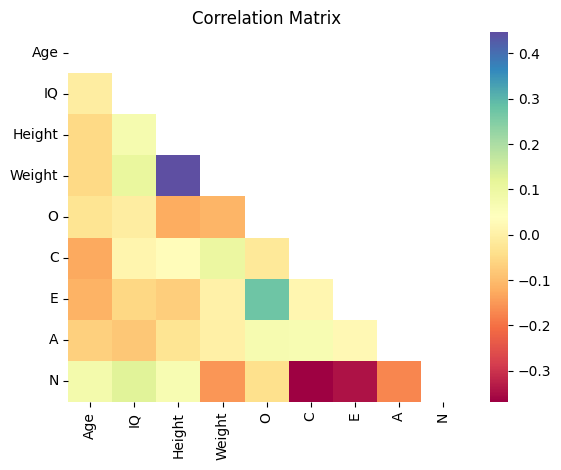

In [50]:
# sns.heatmap(corrs, cmap='Spectral', vmin=-0.4, vmax=0.4, mask=mask)
sns.heatmap(corrs, cmap='Spectral', mask=mask)
plt.title('Correlation Matrix')
plt.show()

## Outlier Analysis

### The Linear Regression Example

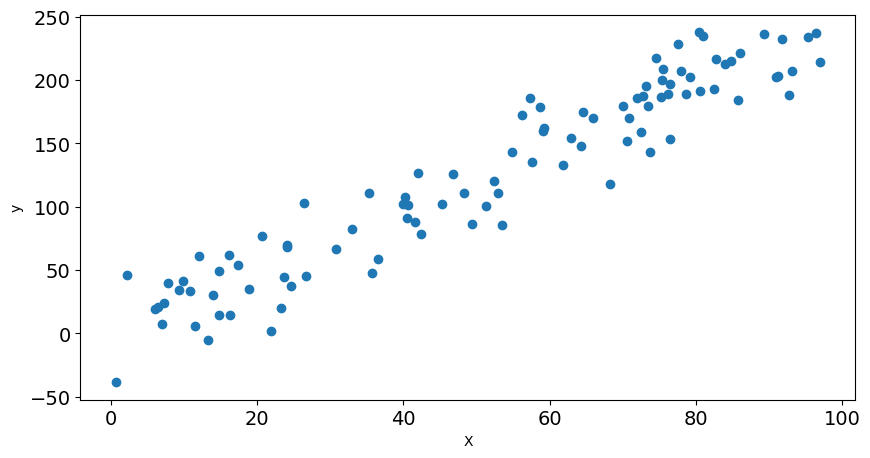

In [51]:
n = 100  # numeber of samples
X_raw = np.random.rand(n).reshape(n,1)*99
y = -7.3 + 2.5*X_raw + np.random.randn(n).reshape(n,1)*25.0

plt.figure(figsize=(10,5))
plt.xlabel('X')
plt.ylabel('y')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(X_raw, y, "o")
plt.show()

In [53]:
X_raw.ndim, y.ndim

(2, 2)

In [54]:
X_raw.flatten()

array([40.69271698, 36.49318785, 68.3103116 , 73.44895377, 42.04155598,
       24.15678318, 78.67092559, 83.94734897, 53.46168538, 24.7073675 ,
       77.60573785, 35.24738956, 90.95079991, 26.40536858, 93.08576778,
       42.36346314, 74.57421186, 20.6804857 , 61.85536566, 57.63766504,
       41.61026336, 72.80754343, 80.97984457, 71.99987089, 80.49669607,
       73.77334269, 14.81525296, 76.46787008, 18.87802084,  9.82300214,
       89.2630009 , 59.22539733, 17.47217625, 62.9848989 , 32.95197814,
       14.01278209, 79.14906106, 10.88867324, 95.28286004, 76.42148547,
       70.51042172, 23.67571305, 75.19950767,  2.23239503, 54.83298158,
       30.76286225, 82.39680072, 75.37077169, 48.29600864, 46.76325228,
        7.24246792, 23.23229558, 70.01747233,  6.49819855, 77.93811625,
       96.97607627,  7.82949999, 45.33209267, 57.32327238, 80.47743444,
       14.85768317, 35.65267396, 82.72363084, 51.3005024 , 16.18412436,
       86.07225056, 92.67629884, 73.22679925, 96.39270293, 91.72

In [ ]:
X_raw.shape

In [ ]:
y.shape

In [55]:
corr, _  = stats.pearsonr(X_raw.flatten(),y.flatten())
corr

0.9522787234750217

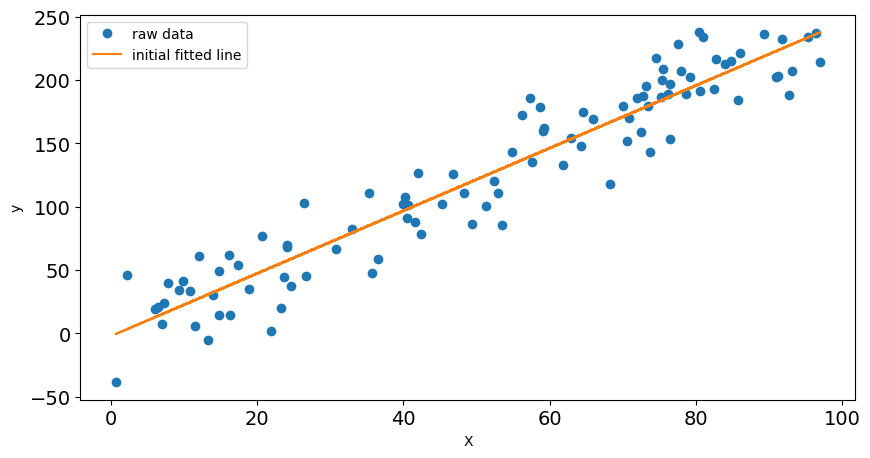

In [56]:
# fit with the closed-form solution
## reconstruct X
X = np.hstack((np.ones((n,1)), X_raw))
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_hat = X.dot(beta)

plt.figure(figsize=(10,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X_raw, y, "o", label='raw data')
plt.plot(X_raw, y_hat, label='initial fitted line')
plt.legend()
plt.show()

In [57]:
# What if we add an additional data points?

X_raw2 = np.append(X_raw, [[40]], axis=0)
y2 = np.append(y,[[5000]], axis=0)

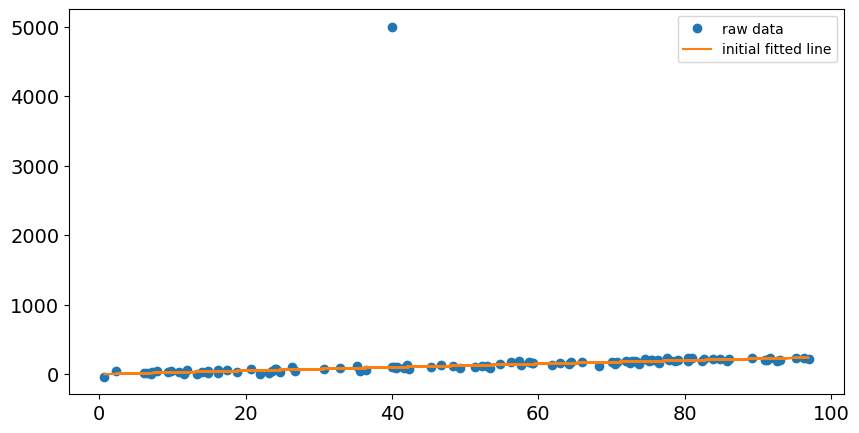

In [58]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(X_raw2, y2, "o", label='raw data')
plt.plot(X_raw, y_hat, label='initial fitted line')
plt.legend()
plt.show()

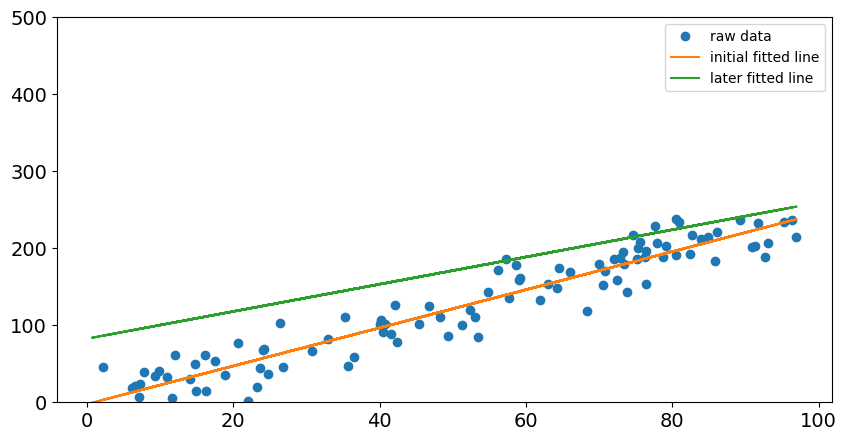

In [59]:
# Fit the data again
X2 = np.hstack((np.ones((n+1,1)), X_raw2))
beta2 = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y2)
y_hat2 = X2.dot(beta2)

plt.figure(figsize=(10,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,500)
plt.plot(X_raw2, y2, "o", label='raw data')
plt.plot(X_raw, y_hat, label='initial fitted line')
plt.plot(X_raw2, y_hat2, label='later fitted line')
plt.legend()
plt.show()

In [ ]:
X_raw2[-3:]

In [ ]:
y2[-3:]

In [ ]:
X_raw[-3:]

In [ ]:
y[-3:]

In [60]:
beta

array([[-2.34221157],
       [ 2.47544005]])

In [61]:
beta2

array([[82.59552383],
       [ 1.76858938]])

### Find outliers from the data distribution

The **68-95-997** rule:
![](https://miro.medium.com/max/24000/1*IZ2II2HYKeoMrdLU5jW6Dw.png)

In [62]:
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

# test the function
demodata = np.random.randn(50000)  * 20 + 20
anomalies = find_anomalies(demodata)

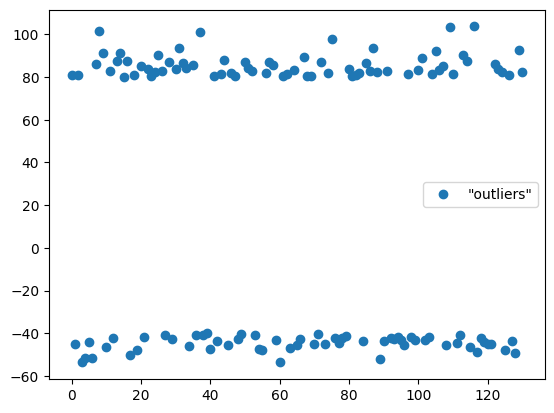

In [63]:
plt.plot(anomalies,'o',label='"outliers"')
plt.legend()
plt.show()

In [64]:
find_anomalies(y2)

[array([5000.])]

### Boxplot
![](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)
More on `boxplot`: https://pythonbasics.org/seaborn-boxplot/

`IQR`: Interquartile Range
* A given dataset is divided into four defined intervals via 3 data points (`Q1`,`Q2`,`Q3`) based upon the values of the data and how they compare to the entire dataset
* `Q1`: 25% percentile
* `Q2`: 50% percentile, or the median
* `Q3`: 75% percentile


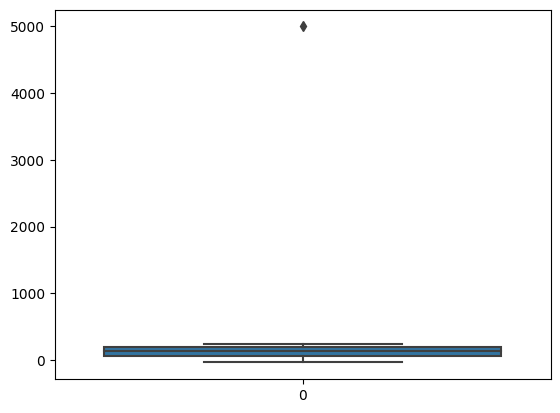

In [65]:
sns.boxplot(data=y2)
plt.show()

In [66]:
np.percentile(a = y2, q = [25,50,75])

array([ 60.84853898, 132.6244266 , 189.08720412])

More on outlier detection: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

# The Python Visualization Landscape


`Visualization` is one of the most important tasks in data analysis. In data exploration stage, you could use visualization to identify outliers and some general patterns exist in the data. In modeling stage, you could use visualization to monitor the performance of your model. In reporting stage, you could use visualization to better illustrate the business insight you want to deliver to the audience. There are a couple of commonly used Python libraries that could help with these use cases:

**Matplotlib**<br/>
`matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is the most popular plotting library in Python, which gives users different levels of control over every aspect of a figure.

**Seaborn**<br/>
`seaborn` provides a high-level interface for drawing attractive and informative statistical graphics. It builds on top of matplotlib and integrates closely with pandas data structures.

**Plotly**<br/>
`plotly` is an open source library enables users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web application using `Dash`

**Bokeh**<br/>
Bokeh is an interactive visualization library for modern web browsers. It provides elegant, concise construction of versatile graphics, and affords high-performance interactivity over large or streaming datasets. Bokeh can help anyone who would like to quickly and easily make interactive plots, dashboards, and data applications.

# Visualization with `matplotlib`

* Comes with the `Anaconda` installation
* If you don't have it on your computer, you could install it with pip or conda at the command line or terminal with
`pip install matplotlib` or `conda install matplotlib`
* `matplotlib` breaks a plot/graph into different components. With the library, you can add/delete/edit these components one by one based on detailed use cases.
* With `matplotlib`, you could create reproducible figures in a programmatic way.

![](https://matplotlib.org/_images/anatomy1.png)

## Import the core library

In [67]:
import matplotlib.pyplot as plt

**`matplotlib` provides two types of methods for you to contruct plots**
* `Function based methods`: It is a Matlab style plotting functions. The coding is very concise, and you can control the plot from a few high level settings.
* `Object-oriented methods`: It is a method that needs you to create figure objects, and all the plot control statements come from the methods or attributes associated with the figure object. The coding is a little bit more complicated, but you have a finer control on the figure components.

## Function Based Methods

### A simple X-Y plot

In [68]:
import numpy as np
x = np.linspace(0,5,10)
y = x ** 2

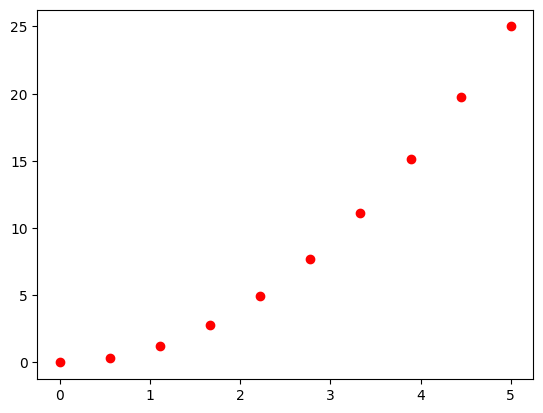

In [70]:
plt.plot(x,y,'ro')
plt.show()

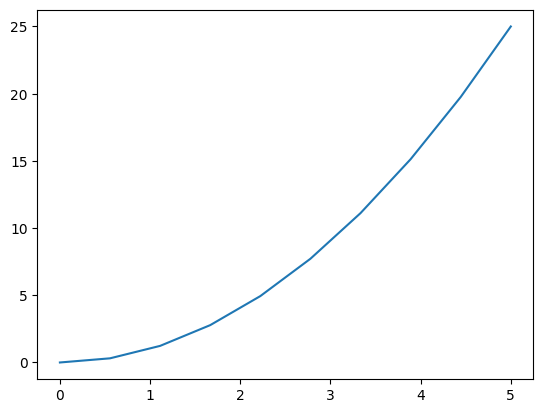

In [71]:
plt.plot(x,y)
plt.show()

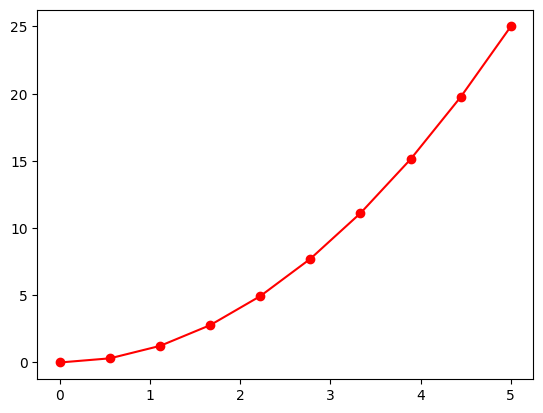

In [72]:
plt.plot(x,y,'ro-')
plt.show()

The format string typically is constructed by 3 components
```python
fmt = '[marker][line][color]'
```
* Check https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html for more details on format strings

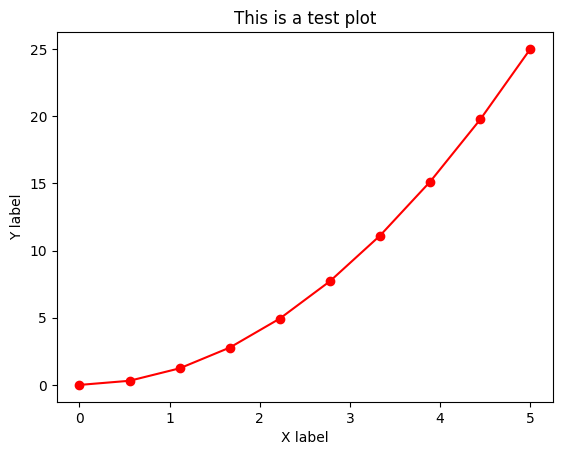

In [73]:
## add titles and x-y axis labels

plt.plot(x,y,'ro-')
plt.title('This is a test plot')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()

### Multiple curves on the same plot

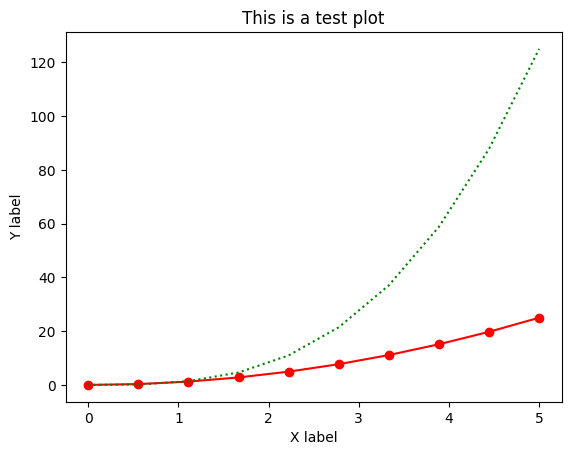

In [74]:
plt.plot(x,y,'ro-')
plt.plot(x,x**3,'g:')
plt.title('This is a test plot')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()

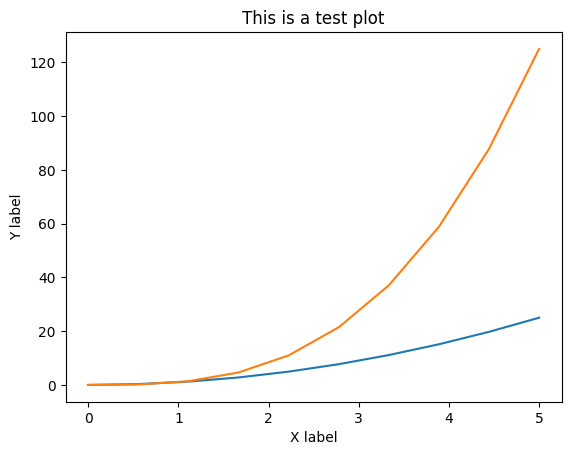

In [75]:
plt.plot(x,y)
plt.plot(x,x**3)
plt.title('This is a test plot')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()

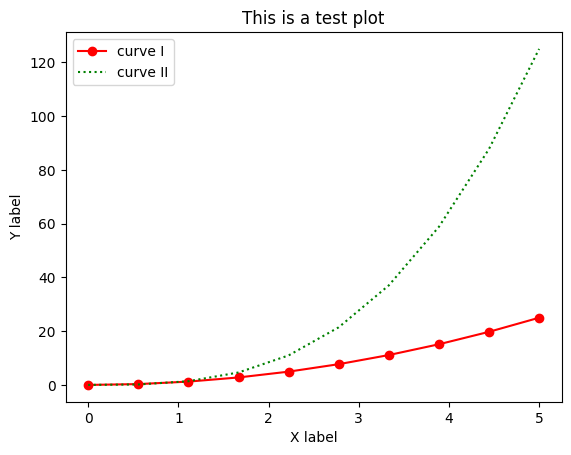

In [76]:
plt.plot(x,y,'ro-', label='curve I')
plt.plot(x,x**3,'g:', label='curve II')
plt.title('This is a test plot')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.legend()
plt.show()

### Multiple plots on the same canvas

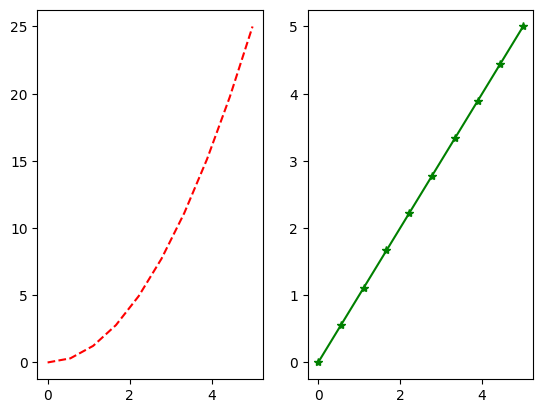

In [77]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(x, x, 'g*-')
plt.show()

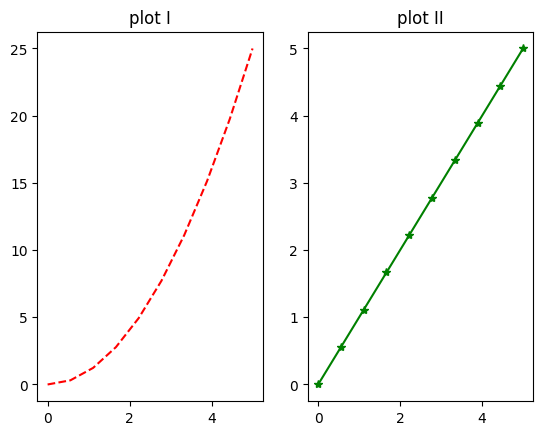

In [78]:
## add titles axis labels
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.title('plot I')
plt.subplot(1,2,2)
plt.plot(x, x, 'g*-')
plt.title('plot II')
plt.show()

## Object-Oriented Methods

### A simple X-Y plot

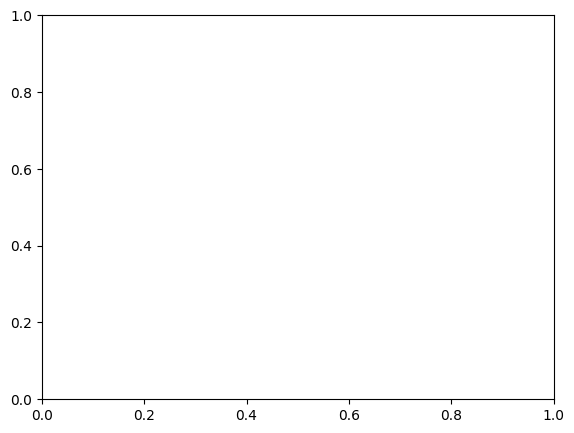

In [79]:
fig = plt.figure()

# Specify the dimensions [left, bottom, width, height] of the new axes
axes = fig.add_axes([0.1,0.1,0.8,0.8])

plt.show()

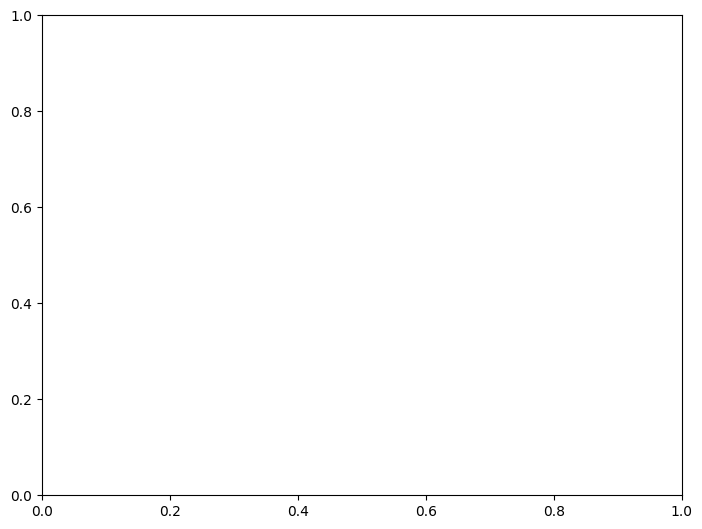

In [80]:
fig = plt.figure()

# Specify the dimensions [left, bottom, width, height] of the new axes
axes = fig.add_axes([0,0,1,1])

plt.show()

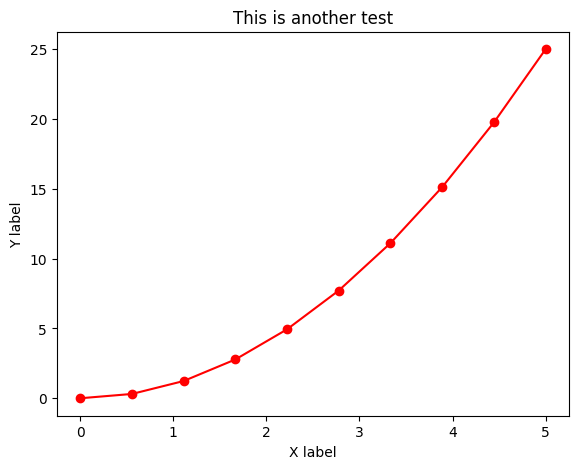

In [81]:
fig = plt.figure()

# Specify the dimensions [left, bottom, width, height] of the new axes
axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(x, y, 'ro-')
axes.set_xlabel('X label')
axes.set_ylabel('Y label')
axes.set_title('This is another test')

plt.show()

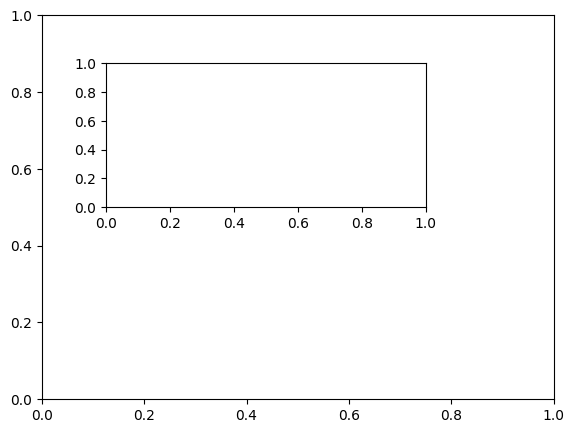

In [82]:
fig = plt.figure()

axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.2,0.5,0.5,0.3])

plt.show()

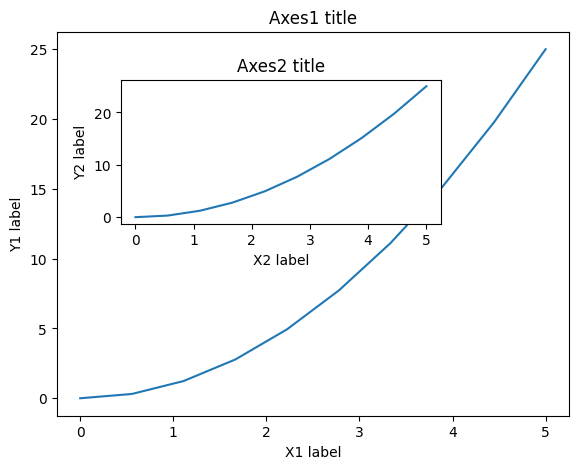

In [83]:
fig = plt.figure()

axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.2,0.5,0.5,0.3])

axes1.plot(x,y)
axes1.set_xlabel('X1 label')
axes1.set_ylabel('Y1 label')
axes1.set_title('Axes1 title')

axes2.plot(x,y)
axes2.set_xlabel('X2 label')
axes2.set_ylabel('Y2 label')
axes2.set_title('Axes2 title')

plt.show()

### Multiple curves on the same plot

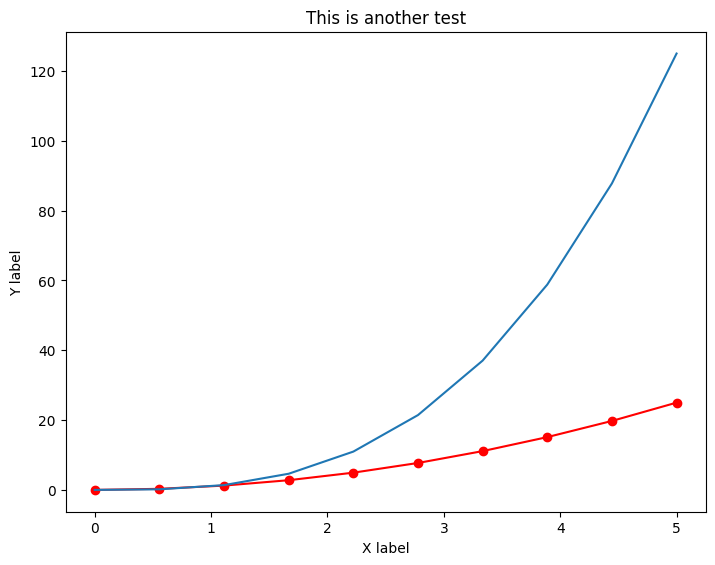

In [84]:
fig = plt.figure()

# Specify the dimensions [left, bottom, width, height] of the new axes
axes = fig.add_axes([0,0,1,1])

axes.plot(x, y, 'ro-')
axes.plot(x, x**3)
axes.set_xlabel('X label')
axes.set_ylabel('Y label')
axes.set_title('This is another test')

plt.show()

### Multiple plots on the same canvas

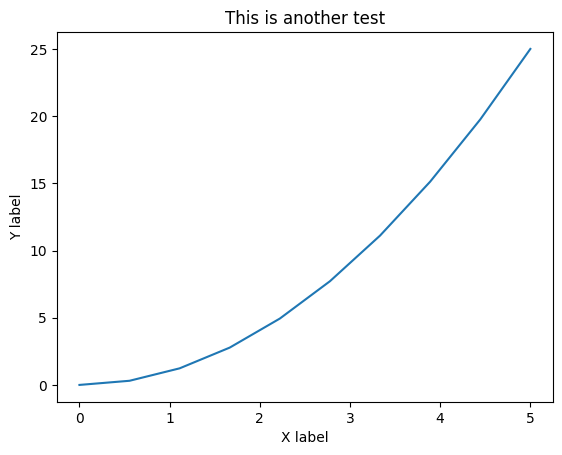

In [85]:
## revisit the simple X-Y plot

fig, axes = plt.subplots()

axes.plot(x,y)
axes.set_xlabel('X label')
axes.set_ylabel('Y label')
axes.set_title('This is another test')

plt.show()

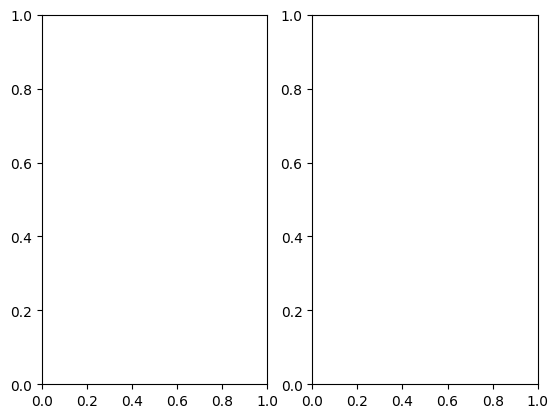

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2)
# axes

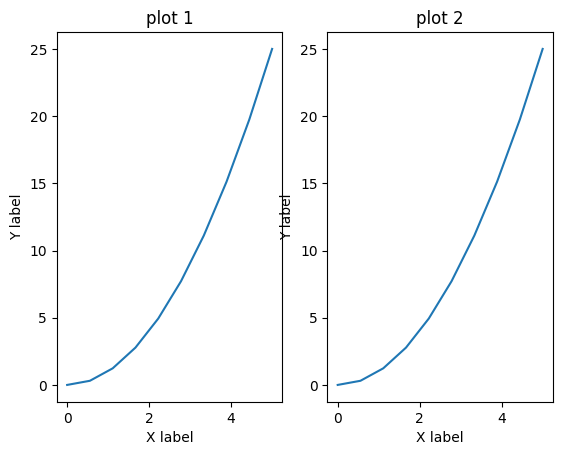

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# for ax in axes:
# for ax in axes:
for idx,ax in enumerate(axes):
    ax.plot(x,y)
    ax.set_xlabel('X label')
    ax.set_ylabel('Y label')
    ax.set_title('plot {}'.format(idx+1))    
plt.show()

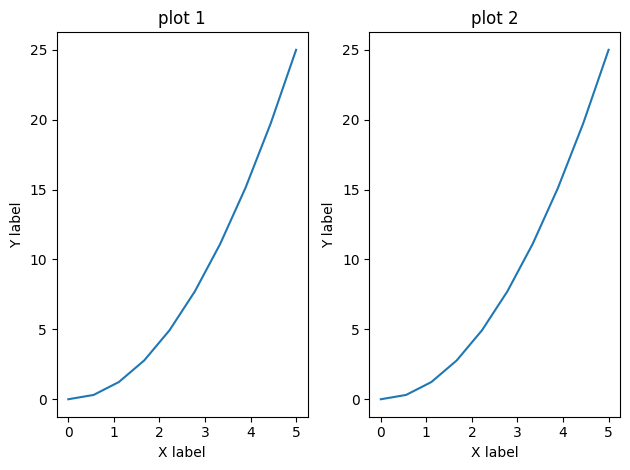

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# for ax in axes:
for idx,ax in enumerate(axes):
    ax.plot(x,y)
    ax.set_xlabel('X label')
    ax.set_ylabel('Y label')
    ax.set_title('plot {}'.format(idx+1))    

plt.tight_layout()
plt.show()

## Save figures

In [89]:
fig.savefig('test1.png') # Supports format of PNG, JPG, EPS, SVG, PGF and PDF

In [90]:
fig.savefig('test.png',dpi=1000) # dpi: resolution in dots per inch

## Different types of plots

### Scatter plot

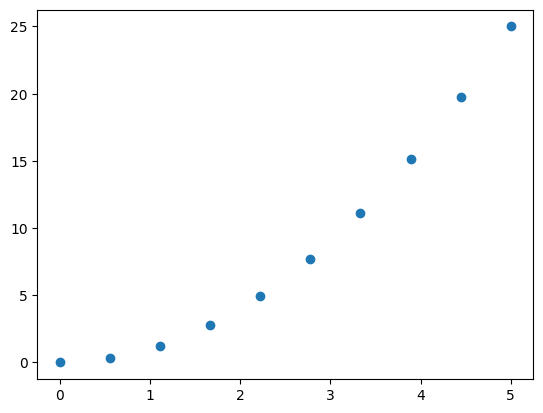

In [91]:
plt.scatter(x,y)
plt.show()

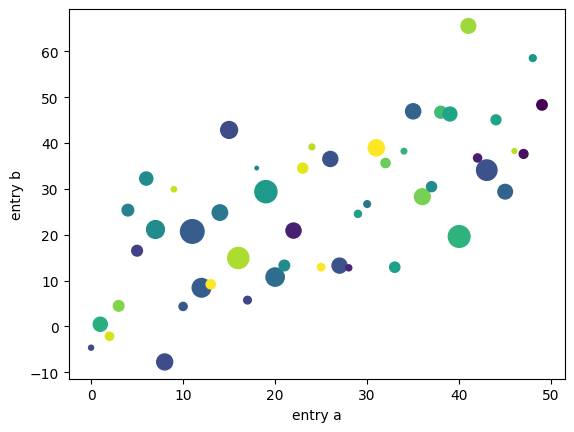

In [92]:
## a fancier scatter plot

data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

In [95]:
import pandas as pd
df = pd.DataFrame(data)
df.head(3)

,a,c,d,b
0,0,12,13.109021,-4.650995
1,1,31,102.636398,0.458419
2,2,46,35.350403,-2.160203


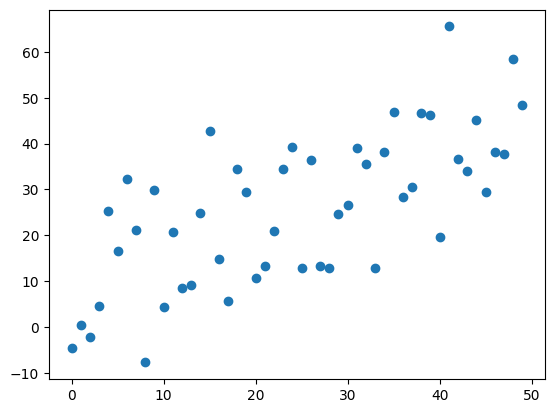

In [97]:
plt.scatter(data['a'], data['b'])
plt.show()

### Bar chart

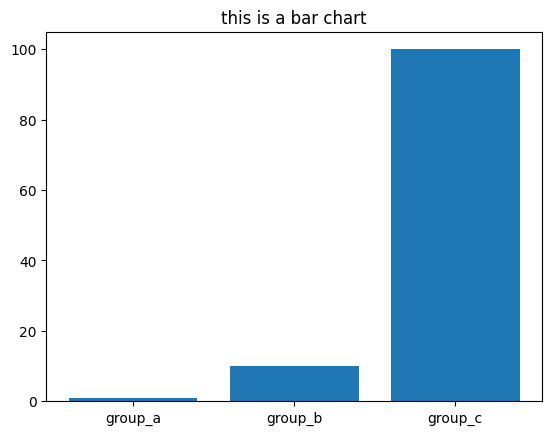

In [99]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

# plt.figure()
plt.bar(names, values)
plt.title('this is a bar chart')
plt.show()

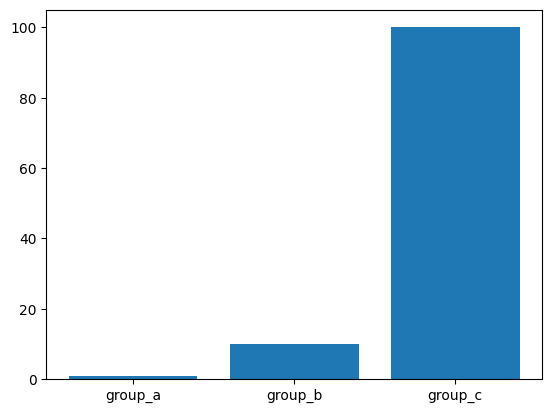

In [100]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

fig,axes = plt.subplots()
axes.bar(names, values)

plt.show()


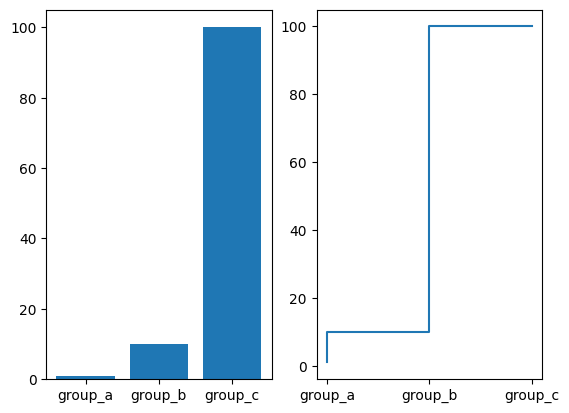

In [101]:
fig,axes = plt.subplots(1,2)

axes[0].bar(names, values)
axes[1].step(names, values)

plt.show()


In [103]:
# help(axes[1].step)

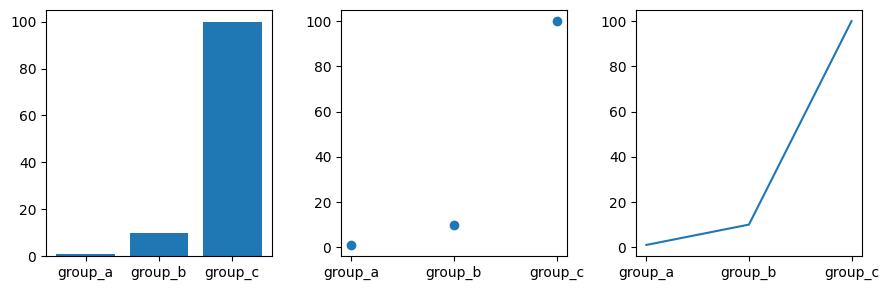

In [104]:
## different representations

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.tight_layout()
plt.show()

### Histogram

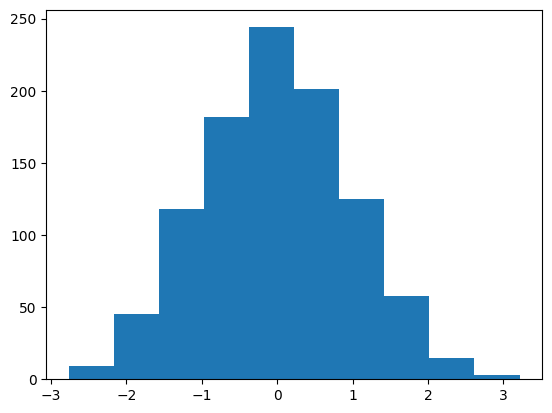

In [105]:
data = np.random.randn(1000)
plt.hist(data)
plt.show()

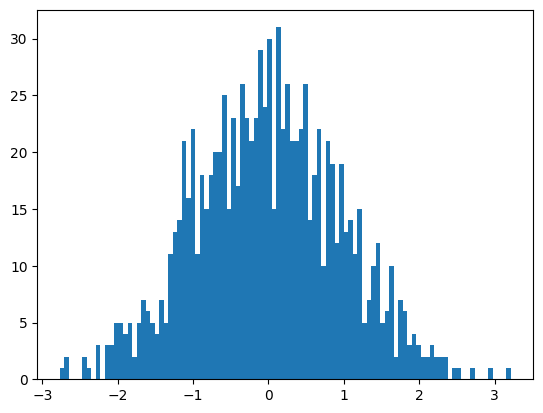

In [106]:
plt.hist(data, bins=100)
plt.show()

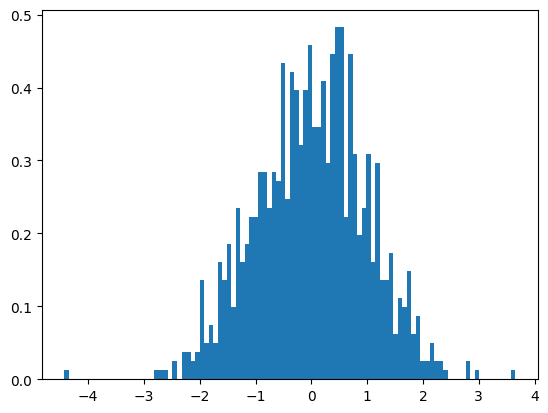

In [107]:
data = np.random.randn(1000)
plt.hist(data, bins=100, density=True)
plt.show()

### Box plot

In [108]:
data.shape

(1000,)

In [110]:
data[:3]

array([ 0.12707482,  0.74267547, -0.83589117])

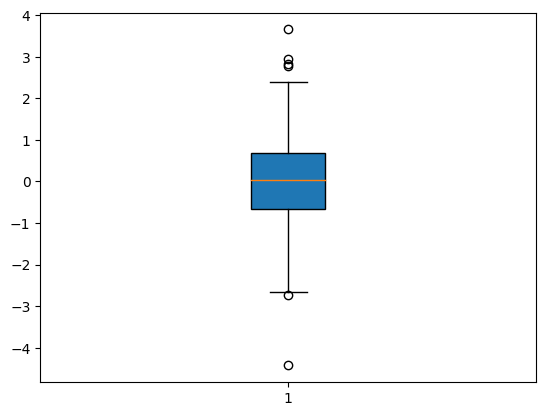

In [111]:
plt.boxplot(data, vert=True, patch_artist=True)
plt.show()

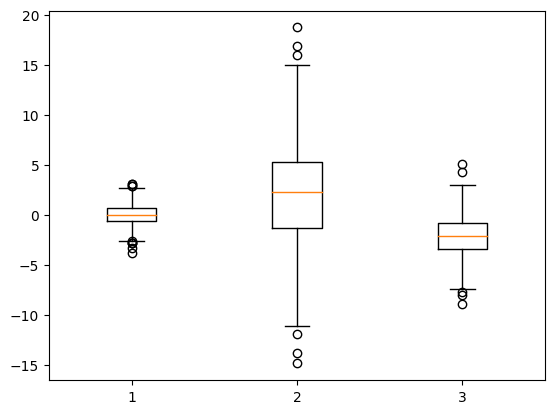

In [112]:
data = [
    np.random.randn(1000),
    np.random.randn(1000)*5 + 2,
    np.random.randn(1000)*2 - 2
]

plt.boxplot(data,vert=True)
plt.show()

### Color fill

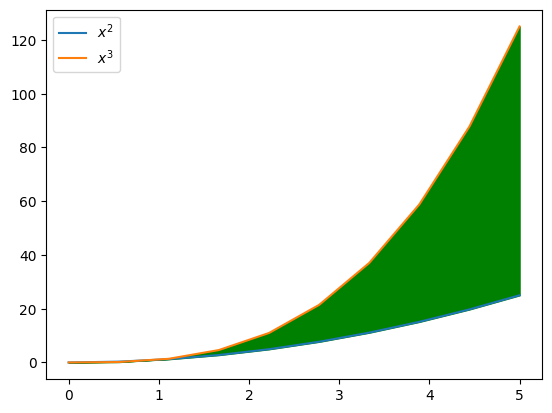

In [115]:
fig,axes = plt.subplots()
axes.fill_between(x, x**2, x**3, color="green")

# plt.plot(x, x**2, label='$x^2$')
# plt.plot(x, x**3, label='$x^3$')
# plt.legend()

axes.plot(x, x**2, label='$x^2$')
axes.plot(x, x**3, label='$x^3$')
axes.legend()

plt.show()


## Figure paramter tuning

### Plot range

In [ ]:
## revisit the simple X-Y plot

fig, axes = plt.subplots()

axes.plot(x,y)
axes.set_xlabel('X label')
axes.set_ylabel('Y label')
axes.set_title('This is another test')
axes.set_xlim(0,3)
axes.set_ylim(0,10)

plt.show()

### Legend

In [ ]:
## plot multiple lines in one graph

fig, axes = plt.subplots()

axes.plot(x,y,label='$x^2$')
axes.plot(x, x**3, label='$x^3$')

axes.set_xlabel('X label')
axes.set_ylabel('Y label')
axes.set_title('This is another test')
axes.set_xlim(0,3)
axes.set_ylim(0,10)

axes.legend()
plt.show()

You can customize the position of the legend box

```sh
        ===============   =============
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10
        ===============   =============
```

In [ ]:
fig, axes = plt.subplots()

axes.plot(x,y,label='$x^2$')
axes.plot(x, x**3, label='$x^3$')

axes.set_xlabel('X label')
axes.set_ylabel('Y label')
axes.set_title('This is another test')
axes.set_xlim(0,3)
axes.set_ylim(0,10)

axes.legend(loc=1) # customize the position
plt.show()

### Text

In [ ]:
## add a text annotation at a specific position in the graph
fig,ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### Line colors, width, styles
* For detailed parameter settings, check https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html

In [ ]:
fig, ax = plt.subplots()

x = np.linspace(0,5,20)
ax.plot(x, x+1, color='b')
ax.plot(x, x+2, color='g')
ax.plot(x, x+3, color='r')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color='r', linewidth=0.25)
ax.plot(x, x+2, color='r', linewidth=0.50)
ax.plot(x, x+3, color='r', linewidth=1.00)
ax.plot(x, x+4, color='r', linewidth=2.00)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color='r', linewidth=0.25)
ax.plot(x, x+2, color='r', linewidth=0.50)
ax.plot(x, x+3, color='r', linewidth=1.00)
ax.plot(x, x+4, color='r', linewidth=2.00)

ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color='r', linewidth=0.25)
ax.plot(x, x+2, color='r', linewidth=0.50)
ax.plot(x, x+3, color='r', linewidth=1.00)
ax.plot(x, x+4, color='r', linewidth=2.00)

ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

ax.plot(x, x+ 8, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+ 9, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+10, color="blue", lw=3, ls='-', marker='s')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color='r', linewidth=0.25)
ax.plot(x, x+2, color='r', linewidth=0.50)
ax.plot(x, x+3, color='r', linewidth=1.00)
ax.plot(x, x+4, color='r', linewidth=2.00)

ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

ax.plot(x, x+ 8, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+ 9, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+10, color="blue", lw=3, ls='-', marker='s')

ax.plot(x, x+11, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+12, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

plt.show()

# Visualization with `seaborn`

## Import the core library

In [ ]:
import seaborn as sns

## Distribution of Data

* All about penguins: [[link](https://seaworld.org/animals/all-about/penguins/physical-characteristics/#:~:text=Flippers,modified%20into%20paddle%2Dlike%20flippers.&text=Each%20flipper%20is%20covered%20with,tapered%2C%20flattened%20flippers%20for%20swimming.)]

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head(3)

In [ ]:
type(penguins)

In [ ]:
penguins.shape

In [ ]:
penguins.island.unique()

In [ ]:
penguins.species.unique()

### Single variable distribution

In [ ]:
sns.distplot(penguins.flipper_length_mm)

In [ ]:
sns.distplot(penguins.flipper_length_mm, kde=False, bins=30)

### Multi-variable joint distribution

In [ ]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data=penguins,kind='scatter')

In [ ]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data=penguins,kind='hex')

In [ ]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data=penguins,kind='reg')

In [ ]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex')

### Pair Plot

In [ ]:
sns.pairplot(penguins, hue='sex')
# sns.pairplot(penguins)

In [ ]:
sns.pairplot(penguins, hue='sex')

In [ ]:
sns.pairplot(penguins, hue='sex',palette='rainbow')

### barplot and countplot

* `Barplot` shows point estimates and confidence intervals as rectangular bars. By default, it displays the mean value. You could also pass in a customized function
* Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html

In [ ]:
sns.barplot(x='species',y='bill_length_mm',data=penguins) # by default it displays the mean values

In [ ]:
sns.barplot(x='species',y='bill_length_mm',data=penguins,estimator=np.std)

In [ ]:
sns.barplot(x='species',y='bill_length_mm',data=penguins,hue='sex')

* `Countplot` shows the counts of observations in each categorical bin using bars.

In [ ]:
sns.countplot(x='island',data=penguins)

### Boxplot/Violionplot/Stripplot

In [ ]:
sns.boxplot(x='species',y='flipper_length_mm',data=penguins,hue='island')

In [ ]:
sns.boxplot(y='species',x='flipper_length_mm',data=penguins,hue='island',orient='h')

In [ ]:
sns.violinplot(x='species',y='flipper_length_mm',data=penguins,hue='island')

In [ ]:
sns.stripplot(x='species',y='flipper_length_mm',data=penguins,hue='island')

In [ ]:
# a more general format

In [ ]:
sns.catplot(x='species',y='flipper_length_mm',data=penguins,hue='island',kind='box')

## Heatmap

In [ ]:
sns.heatmap(penguins.corr(),cmap='coolwarm')

In [ ]:
penguins.dtypes

## Grids

In [ ]:
sns.PairGrid(penguins)

In [ ]:
g = sns.PairGrid(penguins)
g.map(plt.scatter)

In [ ]:
g = sns.PairGrid(penguins)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [ ]:
g = sns.JointGrid(x="bill_length_mm", y="body_mass_g", data=penguins)

In [ ]:
g = sns.JointGrid(x="bill_length_mm", y="body_mass_g", data=penguins)
g = g.plot(sns.regplot, sns.histplot)

## Regression Plot

* Reference: https://seaborn.pydata.org/tutorial/regression.html

In [ ]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,)

In [ ]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex')

In [ ]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex',markers=['o','v'])

In [ ]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,col='sex')

In [ ]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,col='sex',row='species')

In [ ]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex',row='species')

## Colors and Styles

Reference: `matplotlib` colormap: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

In [ ]:
sns.set_style(style='darkgrid')
# sns.set_context('notebook',font_scale=1)
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex',palette='seismic')

# Appendix I: Visualization with `plotly`

* Getting Started with Plotly in Python: https://plotly.com/python/getting-started/

# Appendix II: Visulization with `bokeh`

* Bokeh documentation: https://docs.bokeh.org/en/latest/index.html
    * Quick tutorial: [[link](https://mybinder.org/v2/gh/bokeh/bokeh-notebooks/master?filepath=tutorial%2F00%20-%20Introduction%20and%20Setup.ipynb)]